# Importing Libraries 

In [1]:
pwd

'C:\\Users\\hp'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Reading Data Set

In [68]:
df = pd.read_csv("loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(df.shape)

(614, 13)


Here, we can see that **13 columns** and **614 rows**

#  Data Exploring

Now drop null or missing values in every feature and count the difference in percentage in every column in applicants


# Loan ID

In [6]:
df.Loan_ID.value_counts(dropna=False)

LP002160    1
LP001807    1
LP001350    1
LP002229    1
LP001487    1
           ..
LP001256    1
LP002422    1
LP002366    1
LP002893    1
LP002308    1
Name: Loan_ID, Length: 614, dtype: int64

# Gender

In [7]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

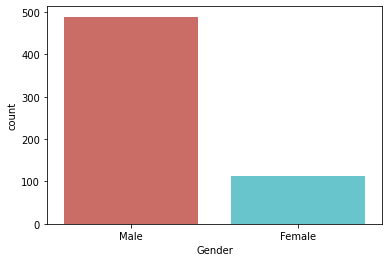

In [8]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [9]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

# here we can see that male applicants are higher than female applicants

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


# Married

In [10]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

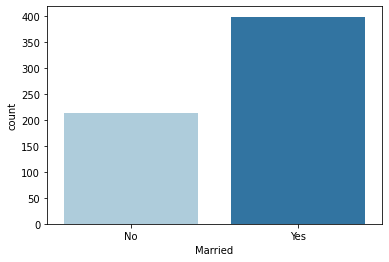

In [11]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

The number of applicants that has been married is higher compared to applicants that hasn't married

In [12]:
# percentage of married and not-married applicants

countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

# here we can see that married applicants are more than non married applicants

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


# Education

In [13]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

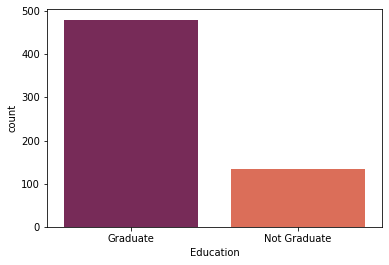

In [14]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [15]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


here graduated applicants are more than non-graduated applicants

# Self Employed

In [69]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

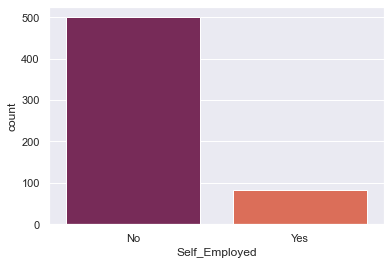

In [70]:
sns.countplot(x="Self_Employed", data=df, palette="rocket")
plt.show()

In [18]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


The number of applicants that are not self employed is higher compared to applicants that are self employed.

# Credit History

In [19]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

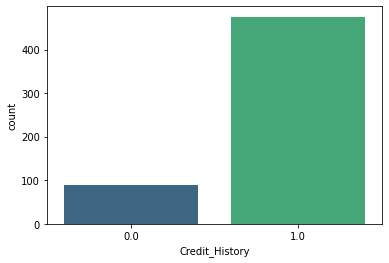

In [20]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [21]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


Here Applicants with good credit history are more than apploicants with bad credit history

# Property Area

In [22]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

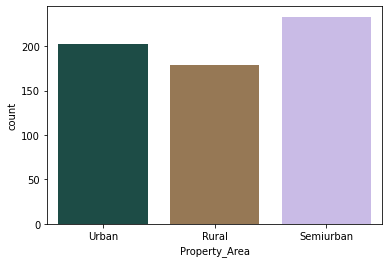

In [23]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [24]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


here we checked the balanced distribution between Urban, Rural, and Semiurban property area.

# Loan Status

In [25]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

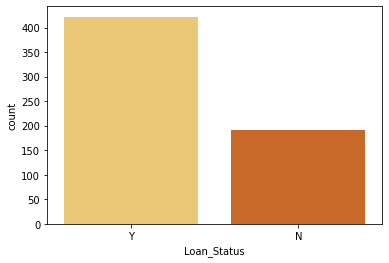

In [26]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [27]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


The number of approved loans is higher compared to rejected loans .

# Loan Amount Term

In [28]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

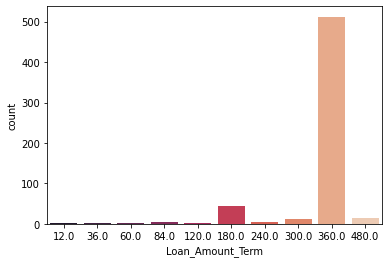

In [29]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [30]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


here the 360 days loan duration has more percentage compared to others.

# Numerical Variables 


### Describe Numerical Variable 
This section will show mean, count, std, min, max and others using describe function.


In [71]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


# Distribution of Numerical Variable 
here we can see the distribution of numerical variable using violin plot.

#### Violin Plot 

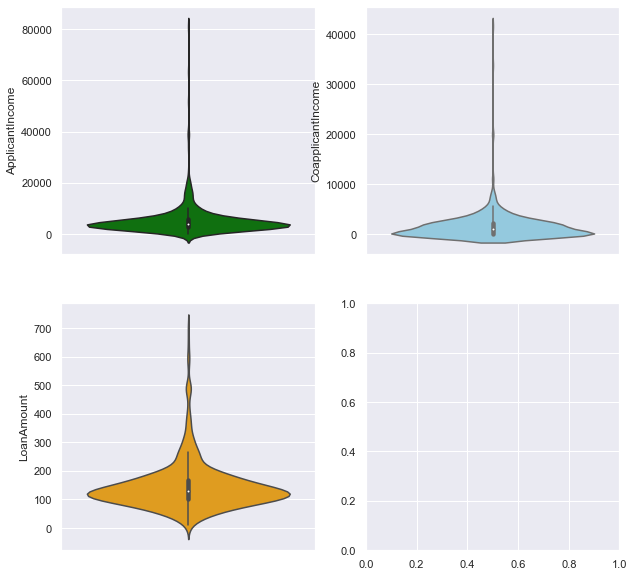

In [33]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers.
The distribution of Loan Amount Term is negativly skewed and it has outliers.


###  Categorical  - Categorical Variables

Now , we compare the two features likw categorical and numerical both

here we are comapring the catogerical and categorical features


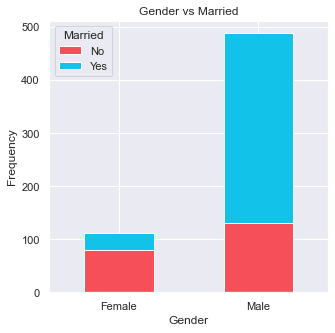

In [34]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married is high compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

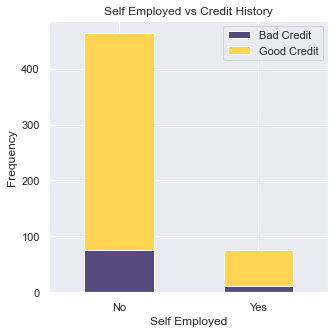

In [35]:
# here we comapring the both are categorical variables self employed and credit history

pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

here not self employed applicants have good credit when compared to self employed applicants.

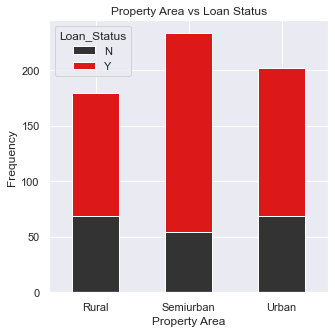

In [36]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

here we can see that properties in semi-urban area has more acceptence of loan status

###  Categorical- Numerical features

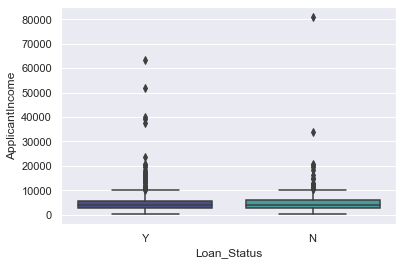

In [37]:
# now check with if there is any outliers in applicantincome and co-applicant income with diffeerent types plots

sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");
# there are some outliers in applicants income with loan status

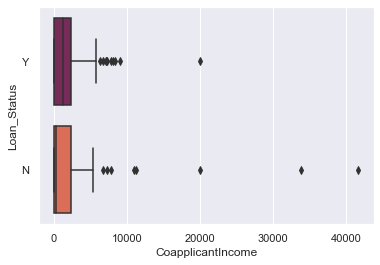

In [38]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

here we can see that Co-Applicant Income has a number of outliers, and the distribution is also positively skewed.

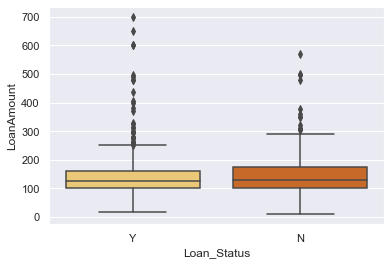

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

here, we can see that Co-Applicant Income has a high number of outliers, and the distribution is also positively skewed.

###  Numerical - Numerical 

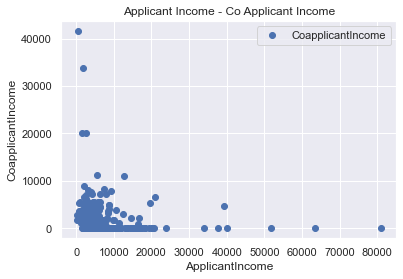

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [40]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

here the negative correlation is happening between them and also it has 95 percent confidence interval

## Null Values

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

## Droping Unecessary Variables
 Unecessary variables will be dropped in this section.

In [44]:
df = df.drop(['Loan_ID'], axis = 1)

## Data Imputation
Imputation is a technique for substituting an estimated value for missing values in a dataset. 

### Categorical Variables 
here we do the imputation for categorical variables will be performed using *mode*.

In [45]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

### Numerical Variables
here we do the imputation for numerical variables using *mean*

In [46]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

## One-hot Encoding
Now, we have to convert catogerical variables in to numbers because machine algos can't do better work with
categorical variables so that's why we use one hot encoding

In [47]:
# here dummies are used to convert categorical variables in to add variables  

df = pd.get_dummies(df)

# Droping columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Renaming columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

## Remove Outliers

Outliers leads to abnormality of data so we have to remove to outliers by using quantile method

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Square Root Transformation

Here, we use *square root transformation* to normalized the distribution.
 it is used to normalize the skewed data for smooth curve of data

In [49]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

## Features Separating
Dependent features (Loan_Status) will be seperated from independent features.

In [51]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## SMOTE Technique
In previous exploration, it can be seen that *the number between approved and rejected loan is imbalanced*. In this section, *oversampling technique will be used to avoid overfitting*,

In [52]:
X, y = SMOTE().fit_resample(X, y)

## Data Normalization
Here, we perform normalization *to normalize the range of independent variables or features of data*

In [54]:
X = MinMaxScaler().fit_transform(X)

## Splitting Data Set
Here, we split our data in to 80 and 20 percent for test and train purposes

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Implementation

##  Logistic Regression

In [60]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.78      0.82      0.80        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[18  5]
 [ 4 18]]
LR accuracy: 80.00%


##  K-Nearest Neighbour (KNN)

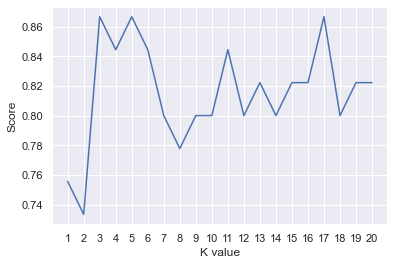

KNN best accuracy: 86.67%


In [61]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

##  Support Vector Machine (SVM)

In [58]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.81      0.95      0.88        22

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.88      0.87      0.87        45

[[18  5]
 [ 1 21]]
SVC accuracy: 86.67%


##  Random Forest

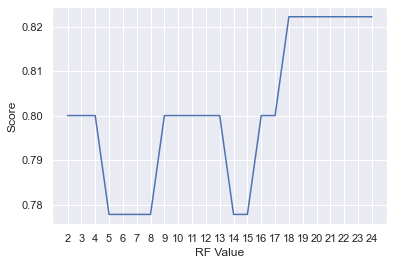

Random Forest Accuracy:  82.22%


In [62]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)

print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

# Comapring the Models

In [64]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'RandomForest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,86.666667
2,SVM,86.666667
3,RandomForest,82.222222
0,Logistic Regression,80.000000


Here we can seen that **all models can achieve up to 82.75% accuracy on an average**
The highest accuracy is **86.67%**